In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [9]:
# best_columns = "+".join(['longitude', 'latitude', 'housing_median_age',"total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"])
# model_patsy = ols(f'median_house_value ~ {best_columns}', data=immo_df).fit()

# anova_table = sm.stats.anova_lm(model_patsy, typ=2)
# anova_table

In [10]:
# Plot
# pplot = sm.ProbPlot(model_patsy.resid, fit = True)
# pplot.qqplot(line = 's')
# plt.show()

In [11]:
eleventh_it = pd.read_pickle("data/eleventh_iteration.pkl")

In [12]:
X = eleventh_it.copy()
y = X.pop("median_house_value")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [13]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

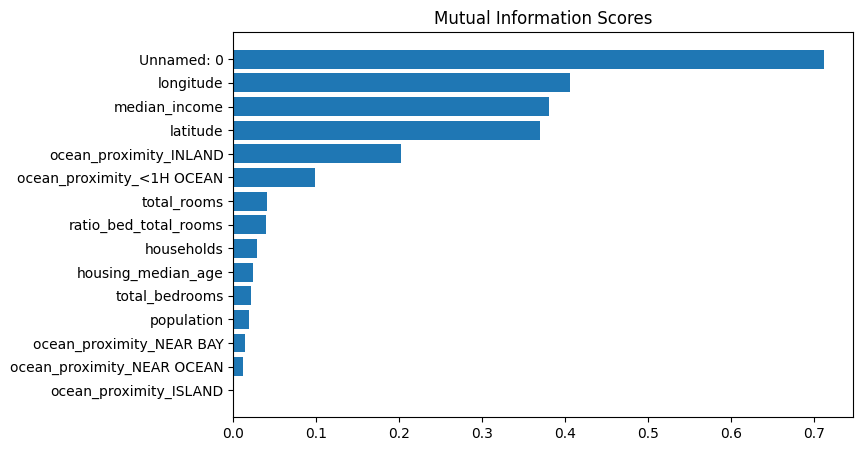

In [14]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)